# Assignment 1, Gradient Descent

*Replace this line with your name.*

In this first assignment, we are applying python code that performs gradient descent to fit several models to the air quality data discussed in the lecture during the first week.  

## Requirements

1. Implement (or copy from lecture notes if available) the following functions:

    * `linear_model(X, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `W`, a 2 x 1 numpy array of weight values, with the first weight being the bias, or y-intercept, weight
        * Return
            * an N x 1 numpy array of the linear model's predicted outputs for each sample in `X`.
        
    * `linear_model_gradient(X, T, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `T`, an N x 1 numpy array of correct outputs for each input sample
            * `W`, a 2 x 1 numpy array of weight values, with the first weight being the bias, or y-intercept, weight
        * Return
            * an 2 x 1 numpy array of the gradient of the mean squared error function with respect to each weight.

    * `quadratic_model(X, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `W`, a 3 x 1 numpy array of weight values, ordered as the bias weight, the weight for `X`, and the weight for `X**2` 
        * Return
            * an N x 1 numpy array of the quadratic model's predicted outputs for each sample in `X`.
        
    * `quadratic_model_gradient(X, T, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `T`, an N x 1 numpy array of correct outputs for each input sample
            * `W`, a 3 x 1 numpy array of weight values, ordered as for `quadratic_model`
        * Return
            * an 3 x 1 numpy array of the gradient of the mean squared error function with respect to each weight.

    * `quartic_model(X, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `W`, a 5 x 1 numpy array of weight values, ordered as the bias weight, the weight for `X`, the weight for `X**2`, the weight for `X**3`, and the weight for `X**4`
        * Return
            * an N x 1 numpy array of the quartic model's predicted outputs for each sample in `X`.
        
    * `quartic_model_gradient(X, T, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `T`, an N x 1 numpy array of correct outputs for each input sample
            * `W`, a 5 x 1 numpy array of weight values, ordered as for `quartic_model`
        * Return
            * an 5 x 1 numpy array of the gradient of the mean squared error function with respect to each weight.


2. Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells. This is a little different than what was done in class. Plot `CO(GT)` air quality versus the hour of the day to verify you have prepared the data correctly.

3. Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the linear model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the linear model on the same graph.  All of this is illustrated here using a `cubic_model`.  Once this is working, copy and paste the code cells for each model and train each model with at least five different learning rates, from 1.e-2, to 1.e-10 to find rates that result in the lowest error.  Do not change the number of iterations steps.  Include the code and results for each. Discuss in markdown cells the best learning rate values and errors you get for each model.


## Example use of required functions with very simple, toy data.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

In [13]:
X = np.array([0.1, 0.4, 0.7]).reshape(-1, 1)
X

array([[0.1],
       [0.4],
       [0.7]])

In [14]:
T = np.array([2.0, 1.0, 8.0]).reshape(-1, 1)
T

array([[2.],
       [1.],
       [8.]])

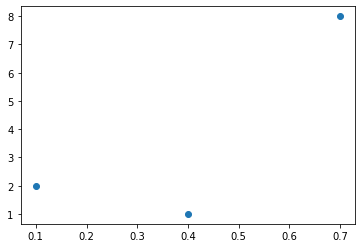

In [15]:
plt.plot(X, T, 'o');

In [16]:
def cubic_model(X, W):
    return np.hstack((X, X**2, X**3)) @ W[1:, :] + W[0, :]

def cubic_model_gradient(X, T, W):
    dEdY = -2 * (T - cubic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

In [17]:
W = np.array([2.0, 1.0, -0.5, 0.3]).reshape((-1, 1))
W

array([[ 2. ],
       [ 1. ],
       [-0.5],
       [ 0.3]])

In [18]:
cubic_model(X, W)

array([[2.0953],
       [2.3392],
       [2.5579]])

In [19]:
cubic_model_gradient(X, T, W)

array([[-2.67173333],
       [-2.17617333],
       [-1.63426933],
       [-1.18722413]])

In [20]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, n_steps):
    # Commonly used parameter values
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    
    for step in range(n_steps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= rho * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence

def rmse(model, X, T, W):
    Y = model(X, W)
    return np.sqrt(np.mean((T - Y)**2))

In [22]:
W = np.zeros((4, 1))
rho = 1.e-1
n_steps = 3000
W, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')

Final RMSE for rho 0.1 at step 3000 is 0.010134


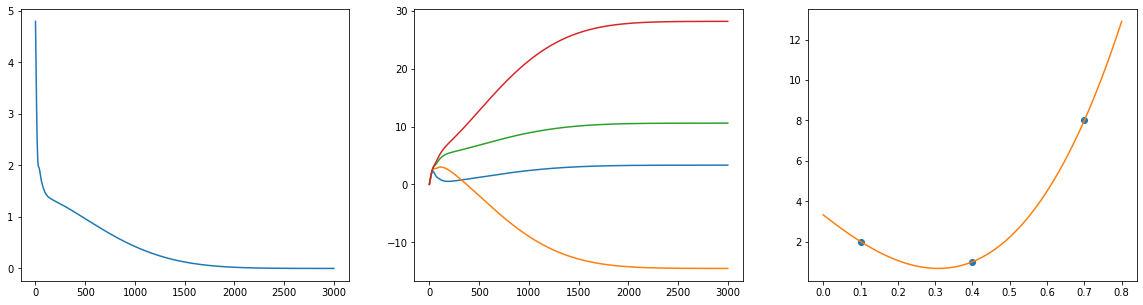

In [23]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(error_sequence)
plt.subplot(1, 3, 2)
plt.plot(W_sequence)
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
xs = np.linspace(0, 0.8, 100).reshape(-1, 1)
plt.plot(xs, cubic_model(xs, W));

Always label all axes of plots, using `plt.xlabel` and `plt.ylabel`.  So, don't follow my bad example here.

# Air Quality Data

Download and prepare the data.  The process is slightly modified from what we did in lecture.  Only using the first 46 samples (reduced to 43 after removing samples with missing values).

In [24]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip -o AirQualityUCI.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1507k  100 1507k    0     0  3906k      0 --:--:-- --:--:-- --:--:-- 3906k
Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [25]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',',
                        usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data[:46]  # only use the first 46 samples
data = data.dropna(axis=0)
    
hour = np.array([int(t[:2]) for t in data['Time']])
CO = np.array(data['CO(GT)'])

T = CO.reshape(-1, 1)
Tnames = ['CO']
X = hour.reshape(-1, 1)
Xnames = ['Hour']
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)

X.shape = (43, 1) Xnames = ['Hour']
T.shape = (43, 1) Tnames = ['CO']


Add code cells here to implement the linear, quadratic, cubic, and quartic models, and to fit the models to the air quality data.

Also add markdown cells that explain each result and summarize your observations of the plots.

## Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.zip](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.zip) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 80/80 if your functions are defined correctly. The remaining 20 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [27]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Anderson-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2]).reshape(-1, 1)
  Y = linear_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3]).reshape(-1, 1)
  Y = quadratic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5).reshape(-1, 1)
  Y = cubic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5, 0.3]).reshape(-1, 1)
  Y = quartic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2,

## Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/86986).

Grading will be based on 

  * correct behavior of the required functions listed above,
  * easy to understand plots in your notebook,
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook.